# Practical session: Naive Bayesian (NB) Classifier - Diabetes

Naive Bayesian Classifier calculates the probability of a class given input features, assuming feature independence. It selects the class with the highest probability.

Naive Bayes applies the Bayes' theorem to calculate the probability of a data point belonging to a particular class. Given the probability of certain related values, the formula to calculate the probability of an event $B$, given event $A$ to occur is calculated as follows.

$P(B|A) = (P(A|B) * P(B) / P(A))$

This theory is considered naive, because it assumes that there is no dependency between any of the input features. Even with this not true or naive assumption, the Naive Bayes algorithm has been proven to perform really well in certain use cases like spam filters.

## Dataset 

The dataset is part of a large dataset maintained at the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. It is used for a diabetes study conducted on Pima Indian women aged 21 and over living in Phoenix, the fifth largest city in the state of Arizona, USA. 

The dataset consists of **768 observations** and 8 numerical independent variables. The target variable is indicated as `outcome`; `1` represents a *positive diabetes test result*, and `0` represents a *negative result*.

### Features 

- `Pregnancies`: Number of pregnancies
- `Glucose`: Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
- `BloodPressure`: Diastolic Blood Pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour Serum insulin (uh/ml)
- `BMI`: Body mass index [weight in kg/(Height in m)]
- `DiabetesPedigreeFunction`: A function that calculates the likelihood of having diabetes based on our family members.
- `Age`: Age (years)
- `Outcome`: Information about whether the individual has diabetes or not. Affected by the disease (`1`) or not (`0`)

In [3]:
## Importing Libraries 

# Base libraries
import numpy as np
import pandas as pd
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Modelling
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## Default options and global variables
pd.set_option("display.float_format", lambda x: "%.2f" % x)
SEED=2024

### Data loading

In [4]:
# Set the data path 
DATA_PATH="../data/diabetes/"
DATA_FILE="diabetes.csv"
print(os.listdir(DATA_PATH))

# read the datafile
df = pd.read_csv(DATA_PATH + DATA_FILE)

# Data dimension 
print("Dataset:",df.shape[0],"rows,",  df.shape[1], "columns")

['README.md', 'diabetes.csv']
Dataset: 768 rows, 9 columns


## Preprocessing

1. The input and output are seperated. 
2. The train and test datasets are determined.

In [5]:
# Independent variables / inputs
x = df.loc[:,'Pregnancies':'Age']
# Dependent variable / output
y = df.loc[:,'Outcome']

# Dataset split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)
x.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.60,0.63,50
1,1,85,66,29,0,26.60,0.35,31
2,8,183,64,0,0,23.30,0.67,32
3,1,89,66,23,94,28.10,0.17,21
4,0,137,40,35,168,43.10,2.29,33


In [6]:
# Check stratification
print("Train:\n", y_train.value_counts()/len(y_train))
print("Test:\n", y_test.value_counts()/len(y_test))

Train:
 Outcome
0   0.65
1   0.35
Name: count, dtype: float64
Test:
 Outcome
0   0.64
1   0.36
Name: count, dtype: float64


### Metrics

1. Accuracy: is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made.

2. Balanced Accuracy is the average between the sensitivity and the specificity, which measures the average accuracy obtained from both the minority and majority classes.

3. Precision is the ratio of true positives to the sum of true positives and false positives, measuring a classifier's accuracy for positive predictions.

4. Recall, or sensitivity, is the ratio of true positives to the sum of true positives and false negatives, assessing a classifier's ability to capture all positives.

5. Confusion matrix summarizes model performance by showing true positives, true negatives, false positives, and false negatives in classification.

6. Precision-Recall curve visually represents the trade-off between precision and recall at different probability thresholds, assessing a classifier's performance.





In [7]:
def print_performance_metrics(y_test, y_pred):
    # metrics info: https://scikit-learn.org/stable/modules/model_evaluation.html
    accuracy = metrics.accuracy_score(y_test, y_pred)
    baccuracy = metrics.balanced_accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
        
    print("Accuracy Score: \t", accuracy, "\nBalanced Accuracy Score:", baccuracy)
    print("Precision Score: \t", precision, "\nRecall Score: \t\t", recall, "\nF1 Score: \t\t", f1score)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
    disp.plot()
    plt.show()

    
def plot_curves(model, x_test, y_test):
    try:
        display1 = metrics.RocCurveDisplay.from_estimator(model, x_test, y_test)
        display1.ax_.set_title("ROC curve")

        display2 = metrics.PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
        display2.ax_.set_title("Precision-Recall curve")
    except:
      print("Error")

## Modelling

### Model fitting

In [8]:
# Model fitting
model = GaussianNB() 
model.fit(x_train, y_train)

GaussianNB()

### Evaluation

In [9]:
model.score(x_test, y_test)

0.7987012987012987

Accuracy Score: 	 0.7987012987012987 
Balanced Accuracy Score: 0.7545454545454545
Precision Score: 	 0.7857142857142857 
Recall Score: 		 0.6 
F1 Score: 		 0.6804123711340206


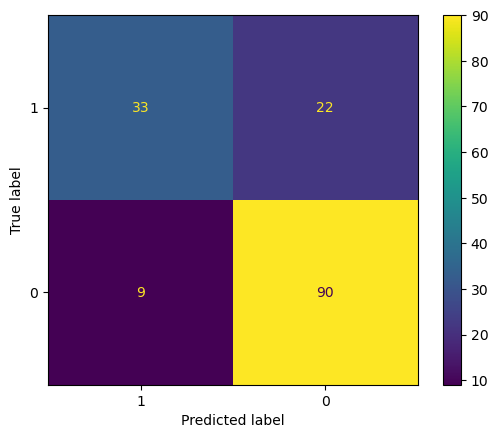

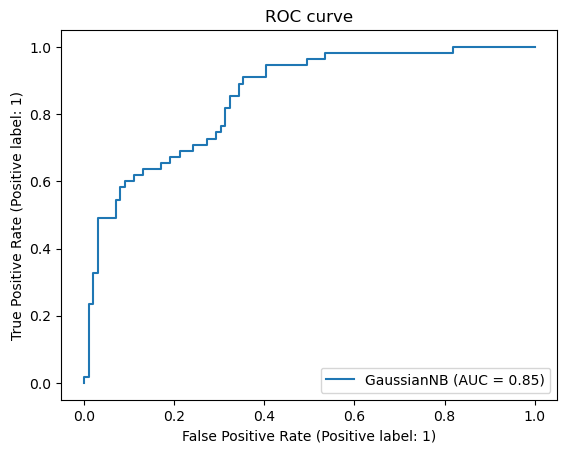

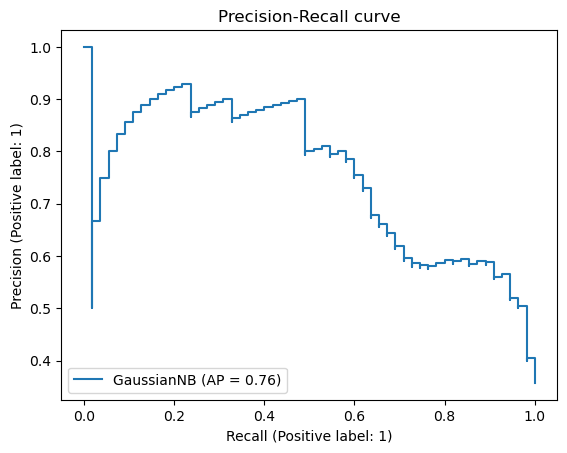

In [13]:
# Predicting values
y_pred = model.predict(x_test)

# Preformance metrics and confusion matrix and ROC curve
print_performance_metrics(y_test, y_pred)
plot_curves(model, x_test,y_test)

## Naive Bayesian with Normalized Data

In [14]:
# Rescaling predictors
sc=StandardScaler()
scaler = sc.fit(x_train)
print("mean:", scaler.mean_, "\nvariance:", scaler.var_)

# Generating the standardized values of X and y
x_train_scaled= pd.DataFrame(scaler.transform(x_train), columns=x.columns)
x_test_scaled= pd.DataFrame(scaler.transform(x_test), columns=x.columns)


print(x_train.head().T)
print(x_train_scaled.head().T)

mean: [  3.80130293 121.40228013  69.45602606  20.71661238  80.94788274
  32.08811075   0.47899023  33.1009772 ] 
variance: [1.11494446e+01 1.06268670e+03 4.10537969e+02 2.48277998e+02
 1.33618637e+04 6.56504287e+01 1.18768896e-01 1.37191758e+02]
                            529    402   81     63     704
Pregnancies                0.00   5.00  2.00   2.00   4.00
Glucose                  111.00 136.00 74.00 141.00 110.00
BloodPressure             65.00  84.00  0.00  58.00  76.00
SkinThickness              0.00  41.00  0.00  34.00  20.00
Insulin                    0.00  88.00  0.00 128.00 100.00
BMI                       24.60  35.00  0.00  25.40  28.40
DiabetesPedigreeFunction   0.66   0.29  0.10   0.70   0.12
Age                       31.00  35.00 22.00  24.00  27.00
                             0     1     2     3     4
Pregnancies              -1.14  0.36 -0.54 -0.54  0.06
Glucose                  -0.32  0.45 -1.45  0.60 -0.35
BloodPressure            -0.22  0.72 -3.43 -0.57  0.32
Sk

Accuracy Score: 	 0.7987012987012987 
Balanced Accuracy Score: 0.7545454545454545
Precision Score: 	 0.7857142857142857 
Recall Score: 		 0.6 
F1 Score: 		 0.6804123711340206


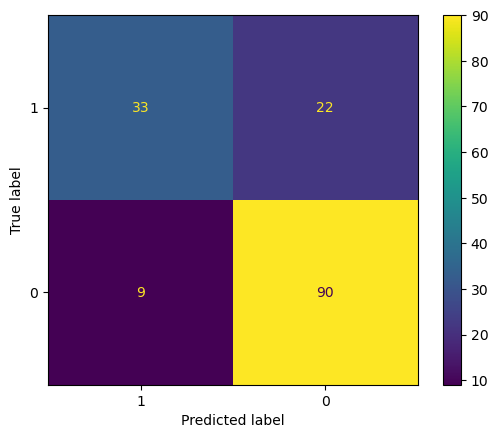

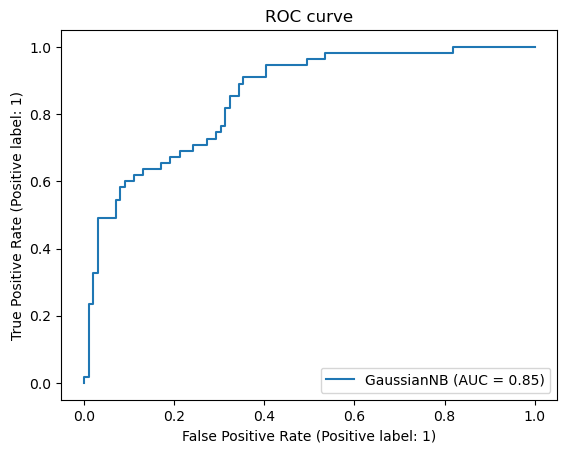

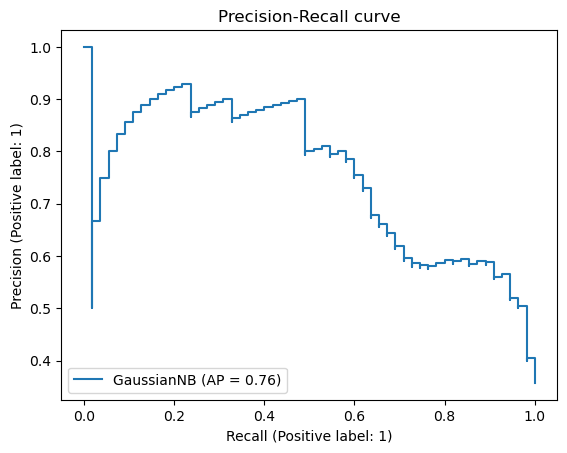

In [18]:
## Model fitting
gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
y_predN = gnb.predict(x_test_scaled)
print_performance_metrics(y_test, y_predN)
plot_curves(gnb, x_test_scaled, y_test)